In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from tensorflow.examples.tutorials.mnist import input_data

import time


if not os.path.exists('out/'):
    os.makedirs('out/')

mnist = input_data.read_data_sets('../MNIST_data', one_hot=True)
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]

mb_size = 16
h_dim = 484

W = np.random.randn(X_dim, h_dim) * 0.001
a = np.random.randn(h_dim) * 0.001
b = np.random.randn(X_dim) * 0.001


def sigm(x):
    return 1/(1 + np.exp(-x))


def infer(X):
    # mb_size x x_dim -> mb_size x h_dim
    return sigm(X @ W + a)


def generate(H):
    # mb_size x h_dim -> mb_size x x_dim
    return sigm(H @ W.T + b)


# Contrastive Divergence
# ----------------------
# Approximate the log partition gradient Gibbs sampling

alpha = 0.1
K = 10  # Num. of Gibbs sampling step

for t in range(1, 1001):
    t0 = time.time()
    
    X_mb = (mnist.train.next_batch(mb_size)[0] > 0.5).astype(np.float)
    g = 0
    g_a = 0
    g_b = 0

    for v in X_mb:
        # E[h|v,W]
        h = infer(v)

        # Gibbs sampling steps
        # --------------------
        v_prime = np.copy(v)

        for k in range(K):
            # h ~ p(h|v,W)
            h_prime = np.random.binomial(n=1, p=infer(v_prime))
            # v ~ p(v|h,W)
            v_prime = np.random.binomial(n=1, p=generate(h_prime))

        # E[h|v',W]
        h_prime = infer(v_prime)

        # Compute data gradient
        grad_w = np.outer(v, h) - np.outer(v_prime, h_prime)
        grad_a = h - h_prime
        grad_b = v - v_prime

        # Accumulate minibatch gradient
        g += grad_w
        g_a += grad_a
        g_b += grad_b

    # Monte carlo gradient
    g *= 1 / mb_size
    g_a *= 1 / mb_size
    g_b *= 1 / mb_size

    # Update to maximize
    W += alpha * g
    a += alpha * g_a
    b += alpha * g_b
    
    t1 = time.time()
    print('Epoch {}: {:.3f} sec'.format(t, t1 - t0))


# Visualization
# -------------

def plot(samples, size, name):
    size = int(size)
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(size, size), cmap='Greys_r')

    plt.savefig('out/{}.png'.format(name), bbox_inches='tight')
    plt.close(fig)


X = (mnist.test.next_batch(mb_size)[0] > 0.5).astype(np.float)

H = np.random.binomial(n=1, p=infer(X))
plot(H, np.sqrt(h_dim), 'H')

X_recon = (generate(H) > 0.5).astype(np.float)
plot(X_recon, np.sqrt(X_dim), 'V')

Extracting ../MNIST_data\train-images-idx3-ubyte.gz
Extracting ../MNIST_data\train-labels-idx1-ubyte.gz
Extracting ../MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data\t10k-labels-idx1-ubyte.gz
Epoch 1: 0.256 sec
Epoch 2: 0.148 sec
Epoch 3: 0.156 sec
Epoch 4: 0.150 sec
Epoch 5: 0.159 sec
Epoch 6: 0.152 sec
Epoch 7: 0.150 sec
Epoch 8: 0.139 sec
Epoch 9: 0.148 sec
Epoch 10: 0.144 sec
Epoch 11: 0.150 sec
Epoch 12: 0.145 sec
Epoch 13: 0.150 sec
Epoch 14: 0.144 sec
Epoch 15: 0.152 sec
Epoch 16: 0.147 sec
Epoch 17: 0.151 sec
Epoch 18: 0.160 sec
Epoch 19: 0.149 sec
Epoch 20: 0.144 sec
Epoch 21: 0.148 sec
Epoch 22: 0.145 sec
Epoch 23: 0.149 sec
Epoch 24: 0.144 sec
Epoch 25: 0.148 sec
Epoch 26: 0.163 sec
Epoch 27: 0.153 sec
Epoch 28: 0.145 sec
Epoch 29: 0.149 sec
Epoch 30: 0.144 sec
Epoch 31: 0.149 sec
Epoch 32: 0.145 sec
Epoch 33: 0.148 sec
Epoch 34: 0.145 sec
Epoch 35: 0.151 sec
Epoch 36: 0.154 sec
Epoch 37: 0.156 sec
Epoch 38: 0.140 sec
Epoch 39: 0.147 sec
Epoch 40: 0.142 sec
Epo

Epoch 388: 0.153 sec
Epoch 389: 0.153 sec
Epoch 390: 0.153 sec
Epoch 391: 0.151 sec
Epoch 392: 0.154 sec
Epoch 393: 0.144 sec
Epoch 394: 0.173 sec
Epoch 395: 0.134 sec
Epoch 396: 0.165 sec
Epoch 397: 0.157 sec
Epoch 398: 0.158 sec
Epoch 399: 0.160 sec
Epoch 400: 0.153 sec
Epoch 401: 0.166 sec
Epoch 402: 0.154 sec
Epoch 403: 0.147 sec
Epoch 404: 0.147 sec
Epoch 405: 0.149 sec
Epoch 406: 0.154 sec
Epoch 407: 0.156 sec
Epoch 408: 0.145 sec
Epoch 409: 0.142 sec
Epoch 410: 0.148 sec
Epoch 411: 0.144 sec
Epoch 412: 0.149 sec
Epoch 413: 0.142 sec
Epoch 414: 0.147 sec
Epoch 415: 0.142 sec
Epoch 416: 0.150 sec
Epoch 417: 0.146 sec
Epoch 418: 0.148 sec
Epoch 419: 0.148 sec
Epoch 420: 0.152 sec
Epoch 421: 0.158 sec
Epoch 422: 0.162 sec
Epoch 423: 0.155 sec
Epoch 424: 0.163 sec
Epoch 425: 0.144 sec
Epoch 426: 0.172 sec
Epoch 427: 0.152 sec
Epoch 428: 0.144 sec
Epoch 429: 0.142 sec
Epoch 430: 0.158 sec
Epoch 431: 0.143 sec
Epoch 432: 0.148 sec
Epoch 433: 0.143 sec
Epoch 434: 0.147 sec
Epoch 435: 0.

Epoch 780: 0.148 sec
Epoch 781: 0.148 sec
Epoch 782: 0.150 sec
Epoch 783: 0.146 sec
Epoch 784: 0.147 sec
Epoch 785: 0.143 sec
Epoch 786: 0.149 sec
Epoch 787: 0.145 sec
Epoch 788: 0.151 sec
Epoch 789: 0.145 sec
Epoch 790: 0.150 sec
Epoch 791: 0.146 sec
Epoch 792: 0.150 sec
Epoch 793: 0.144 sec
Epoch 794: 0.144 sec
Epoch 795: 0.146 sec
Epoch 796: 0.149 sec
Epoch 797: 0.145 sec
Epoch 798: 0.147 sec
Epoch 799: 0.142 sec
Epoch 800: 0.147 sec
Epoch 801: 0.145 sec
Epoch 802: 0.148 sec
Epoch 803: 0.141 sec
Epoch 804: 0.148 sec
Epoch 805: 0.145 sec
Epoch 806: 0.150 sec
Epoch 807: 0.141 sec
Epoch 808: 0.147 sec
Epoch 809: 0.140 sec
Epoch 810: 0.148 sec
Epoch 811: 0.144 sec
Epoch 812: 0.148 sec
Epoch 813: 0.147 sec
Epoch 814: 0.149 sec
Epoch 815: 0.147 sec
Epoch 816: 0.148 sec
Epoch 817: 0.146 sec
Epoch 818: 0.145 sec
Epoch 819: 0.143 sec
Epoch 820: 0.145 sec
Epoch 821: 0.142 sec
Epoch 822: 0.148 sec
Epoch 823: 0.143 sec
Epoch 824: 0.145 sec
Epoch 825: 0.143 sec
Epoch 826: 0.148 sec
Epoch 827: 0.

In [27]:
def plot(samples, size, name):
    size = int(size)
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(size, size), cmap='Greys_r')

    plt.savefig('out/{}.png'.format(name), bbox_inches='tight')
    plt.close(fig)


X = (mnist.test.next_batch(mb_size)[0] > 0.5).astype(np.float)

H = np.random.binomial(n=1, p=infer(X))
plot(H, np.sqrt(h_dim), 'H')

X_recon = (generate(H) > 0.5).astype(np.float)
plot(X_recon, np.sqrt(X_dim), 'V')

In [28]:
X = (mnist.test.images[0] > 0.5).astype(np.float)
H = np.random.binomial(n=1, p=infer(X))
X_recon = (generate(H) > 0.5).astype(np.float)

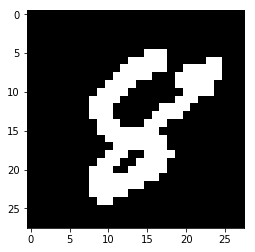

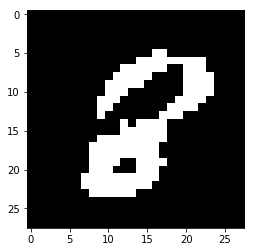

In [30]:
plt.imshow(X.reshape(28,28), cmap='gray')
plt.show()
plt.imshow(X_recon.reshape(28,28), cmap='gray')
plt.show()